In [34]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import pickle

import math

In [38]:
# Open the pickle file in read-binary mode
with open('grid_search_LR.pkl', 'rb') as file:
    grid_search = pickle.load(file)
print(grid_search.best_params_)
C = grid_search.best_params_['C']
penalty = grid_search.best_params_['penalty']
solve_method = grid_search.best_params_['solver']
data = pd.read_csv('data_averages/running_162_data.csv', low_memory=False)
X = data.iloc[:,2:-1]
y = data.iloc[:,-1:].squeeze()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)
model = LogisticRegression(C= C, penalty= penalty, solver = solve_method, max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
fold_acc = accuracy_score(y_test, y_pred)
print(fold_acc)
print(roc_auc_score(y_test, y_pred))





{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.5480238463236917
0.5482270538450313


In [ ]:
#Step 1: Baseline


In [121]:
# Steven's Models
steven = pd.read_csv('val_scores_xgb_svclinear_svc.csv')


# Create dataframes for XGB and SVM models from steven dataframe
XGB = steven[steven['model'] == 'xgb']
SVM = steven[steven['model'] == 'svc']

XGB_sa = XGB[XGB['type'] == 'simple_average']
XGB_wa = XGB[XGB['type'] == 'weighted_average']

SVM_sa = SVM[SVM['type'] == 'simple_average']
SVM_wa = SVM[SVM['type'] == 'weighted_average']


Choice of games LR: 14
Choice of games LR: 18
[0.52807898 0.53115391 0.53382972 0.52832632 0.53836193]
[0.52809443 0.53131525 0.53420362 0.52842327 0.53866605]


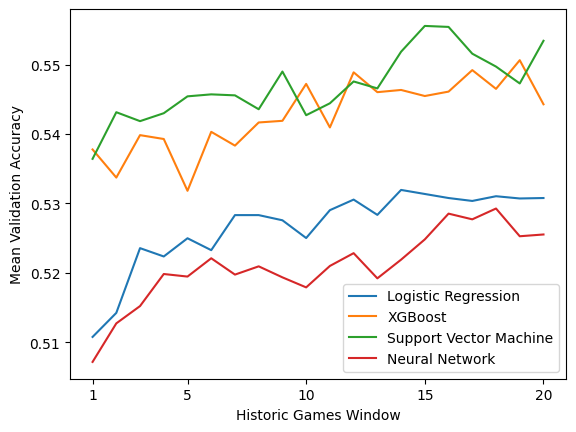

In [68]:
#Step 2: Games window:
LR_step2 = np.load("LR_games_search_acc.npy")
NN_step2 = np.load("NN_val_acc_games_search.npy")

plt.plot(np.linspace(1,20,20), LR_step2.mean(1), label = "Logistic Regression")
plt.plot(XGB_sa['key'], XGB_sa['value'], label = "XGBoost")
plt.plot(SVM_sa['key'], SVM_sa['value'], label = "Support Vector Machine")
plt.plot(np.linspace(1,20,20), NN_step2.mean(1), label = "Neural Network")
plt.xlabel("Historic Games Window")
plt.ylabel("Mean Validation Accuracy")
plt.xticks([1,5,10,15,20])
plt.legend()

LR_best = np.argmax(LR_step2.mean(1))+1
NN_best = np.argmax(NN_step2.mean(1))+1

LR_acc = LR_step2.mean(1)[LR_best-1]
print(f"Choice of games LR: {LR_best}")
print(f"Choice of games LR: {NN_best}")


# Fold results
LR_step2_auc = np.load("LR_games_search_auc.npy")
#NN_step2_auc = np.load("NN_val_auc_games_search.npy")

print(LR_step2[LR_best-1])
print(LR_step2_auc[LR_best-1])
#print(NN_step2_auc[LR_best-1])


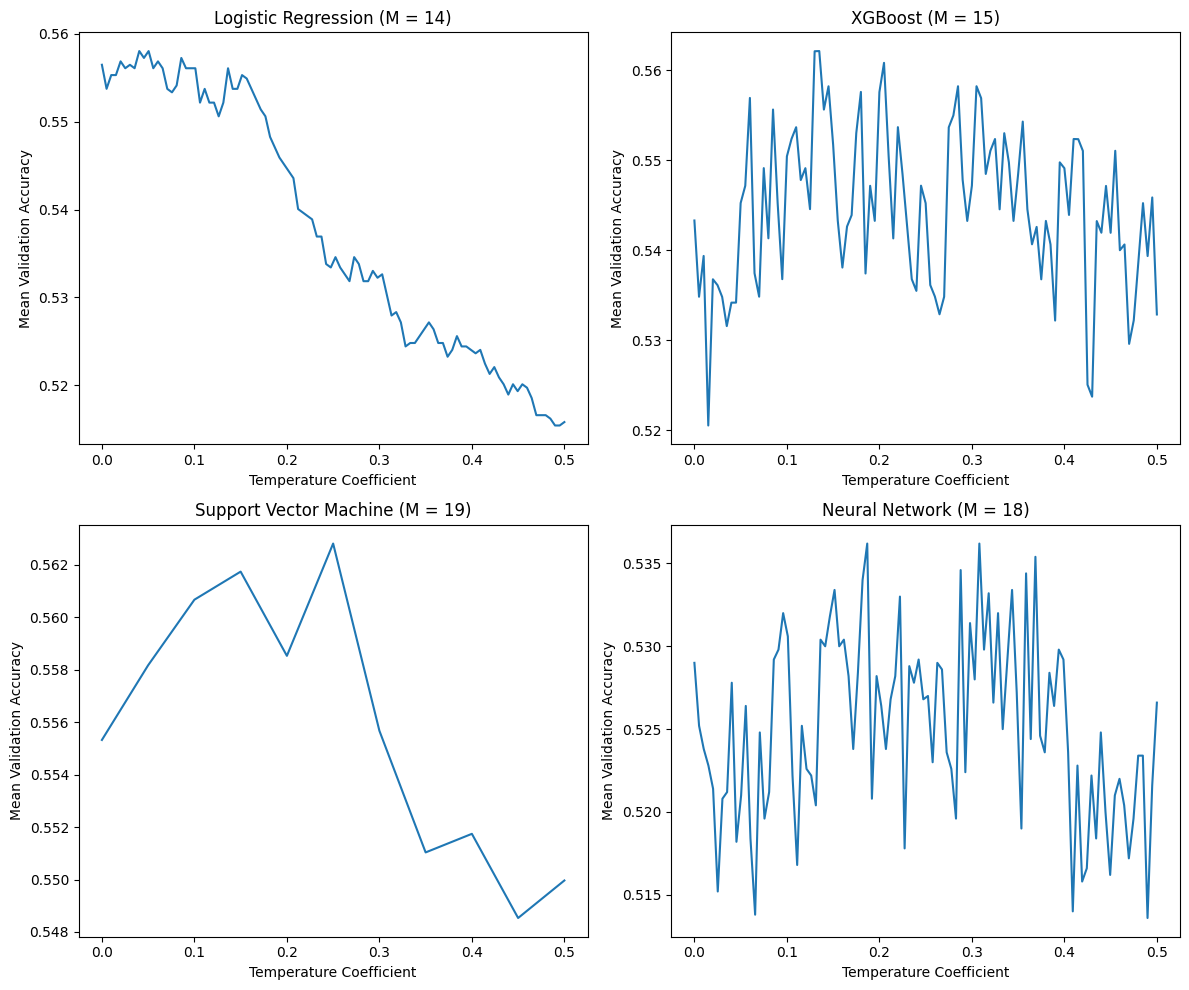

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual data)
LR_step3 = np.load("LR_accuracy_wavg.npy")  # Replace with actual Logistic Regression data
# Save LR_step3 array to CSV
#LR_step3 = np.loadtxt('LR_step3_accuracy.csv', delimiter=',')
#LR_step3 = np.load('LR_accuracy_wavg_v2.npy')
NN_step3 = np.loadtxt('NN_step3_accuracy.csv', delimiter=',')
# Save NN_step3 array to CSV


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# First plot: Logistic Regression
axes[0, 0].plot(np.linspace(0, 0.5, len(LR_step3)), LR_step3.mean(axis=1), label="Logistic Regression (M = 14)")
axes[0, 0].set_title("Logistic Regression (M = 14)")
axes[0, 0].set_xlabel("Temperature Coefficient")
axes[0, 0].set_ylabel("Mean Validation Accuracy")



# Third plot: Support Vector Machine
axes[0, 1].plot(SVM_wa['key'].to_numpy(), SVM_wa['value'].to_numpy(), label="Support Vector Machine (M = 15)")
axes[0, 1].set_title("Support Vector Machine (M = 19)")
axes[0, 1].set_xlabel("Temperature Coefficient")
axes[0, 1].set_ylabel("Mean Validation Accuracy")

# Second plot: XGBoost
axes[1, 0].plot(XGB_wa['key'].to_numpy(), XGB_wa['value'].to_numpy(), label = "XGBoost (M = 19)")
axes[1, 0].set_title("XGBoost (M = 15)")
axes[1, 0].set_xlabel("Temperature Coefficient")
axes[1, 0].set_ylabel("Mean Validation Accuracy")

# Fourth plot: Neural Network
axes[1, 1].plot(np.linspace(0, 0.5, len(NN_step3)), NN_step3.mean(axis=1), label="Neural Network (18)")
axes[1, 1].set_title("Neural Network (M = 18)")
axes[1, 1].set_xlabel("Temperature Coefficient")
axes[1, 1].set_ylabel("Mean Validation Accuracy")

# Adjust layout
plt.tight_layout()
plt.show()


In [106]:
XGB_wa['key']


array([0.        , 0.02631579, 0.05263158, 0.07894737, 0.10526316,
       0.13157895, 0.15789474, 0.18421053, 0.21052632, 0.23684211,
       0.26315789, 0.28947368, 0.31578947, 0.34210526, 0.36842105,
       0.39473684, 0.42105263, 0.44736842, 0.47368421, 0.5       ])